In [1]:
import numpy as np

In [2]:
class NearestNeighbor:
    def train(self, X, Y):
        """X is NxD array, N: training examples, D: flattened img"""
        self.Ytrain = Y
        self.Xtrain = X

    def predict1(self, X, k=1):
        """X is 1xD array, D: flattened img"""

        # L1 distance: d = sum |a - b|
        distances = np.sum(np.abs(self.Xtrain - X), axis=1)

        # L2 distance: d = sqrt(sum (a - b)^2)
        #distances = np.sqrt(np.sum((self.Xtrain - X) ** 2))

        min_indices = distances.argsort()
        Ypred = self.Ytrain[min_indices[:k]]
        _, counts = np.unique(Ypred, return_counts=True)
        return Ypred[counts.argmax()]

In [3]:
from common import *

In [4]:
cifar = cifar10()
trainX = cifar[b'data'][:8000, :]
trainY = cifar[b'labels'][:8000]
testX = cifar[b'data'][8000:, :]
testY = cifar[b'labels'][8000:]
meta = cifar10('meta')
meta

{b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}

In [5]:
%matplotlib inline

b'deer'

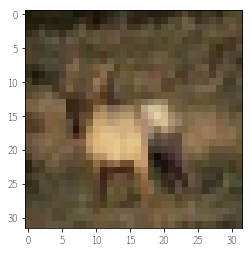

In [6]:
i = 3
imshow(trainX[i, :].reshape(32, 32, 3))
meta[b'label_names'][trainY[i]]

In [7]:
nn = NearestNeighbor()
nn.train(trainX, trainY)

"got b'cat', should be b'automobile'"

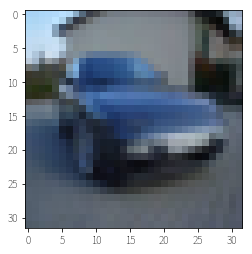

In [8]:
i = 1
pred = nn.predict1(testX[i], 5)
imshow(testX[i, :].reshape(32, 32, 3))
"got %s, should be %s" % (meta[b'label_names'][pred], meta[b'label_names'][testY[i]])

In [9]:
C = 20
testX = testX[:C, :]
testY = testY[:C]
for k in [1, 3, 9, 20, 50]:
    pred = [nn.predict1(testX[i], k) for i in range(C)]
    wrong_cnt = np.count_nonzero(testY - pred)
    print("Precision for k=%d: %.2f" % (k, 1 - (wrong_cnt / C)))

Precision for k=1: 0.30
Precision for k=3: 0.25
Precision for k=9: 0.35
Precision for k=20: 0.25
Precision for k=50: 0.25
